<a href="https://colab.research.google.com/github/Onehundredpunches/Five-model-in-first-report/blob/main/Predict_10_dishes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
folder = '/content/drive/MyDrive/AI Report Photo/10 dishes/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('pho'):
    output = 1.0
  if file.startswith('bread'):
    output = 2.0
  if file.startswith('tet'):
    output = 3.0
  if file.startswith('som'):
    output = 4.0 
  if file.startswith('trang'):
    output = 5.0
  if file.startswith('dau'):
    output = 6.0 
  if file.startswith('nem'):
    output = 7.0
  if file.startswith('xeo'):
    output = 8.0
  if file.startswith('chao'):
    output = 9.0
  if file.startswith('cao'):
    output = 10.0 
  photo = load_img(folder+file, target_size = (80,80))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(6217, 80, 80, 3) (6217,)


In [4]:
# Save data 
save('/content/drive/MyDrive/Colaboratory/AI REPORT/Dishes/Dishes_photos.npy', photos)
save('/content/drive/MyDrive/Colaboratory/AI REPORT/Dishes/Dishes_labels.npy', labels)

In [5]:
# Load data
photos = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/Dishes/Dishes_photos.npy')
labels = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/Dishes/Dishes_labels.npy')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=3)

In [8]:
X_train.shape

(4351, 80, 80, 3)

In [9]:
y_train.shape

(4351,)

In [10]:
X_test.shape

(1866, 80, 80, 3)

In [11]:
y_test.shape

(1866,)

In [12]:
# Standardized data
X_train = X_train.astype('float32')/255
y_train = to_categorical(y_train, 11) 

X_test = X_test.astype('float32')/255
y_test = to_categorical(y_test, 11)

In [13]:
y_train.shape

(4351, 11)

In [14]:
y_test.shape

(1866, 11)

In [15]:
# Import library
from keras.layers.attention.multi_head_attention import activation
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, normalization, LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3), padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(11, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 80, 80, 32)        896       
                                                                 
 dropout_8 (Dropout)         (None, 80, 80, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 40, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 40, 40, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                 

In [26]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(X_train, y_train, batch_size = 150, epochs = 45, verbose = 1)

Epoch 1/45
30/30 [==============================] - 2s 52ms/step - loss: 2.4105 - accuracy: 0.1397
Epoch 2/45
30/30 [==============================] - 1s 47ms/step - loss: 2.2068 - accuracy: 0.2154
Epoch 3/45
30/30 [==============================] - 1s 47ms/step - loss: 2.0527 - accuracy: 0.2726
Epoch 4/45
30/30 [==============================] - 1s 47ms/step - loss: 2.0145 - accuracy: 0.3029
Epoch 5/45
30/30 [==============================] - 1s 47ms/step - loss: 1.8858 - accuracy: 0.3526
Epoch 6/45
30/30 [==============================] - 1s 47ms/step - loss: 1.8362 - accuracy: 0.3650
Epoch 7/45
30/30 [==============================] - 1s 47ms/step - loss: 1.7051 - accuracy: 0.4215
Epoch 8/45
30/30 [==============================] - 1s 47ms/step - loss: 1.6510 - accuracy: 0.4392
Epoch 9/45
30/30 [==============================] - 2s 50ms/step - loss: 1.5823 - accuracy: 0.4564
Epoch 10/45
30/30 [==============================] - 2s 50ms/step - loss: 1.4325 - accuracy: 0.5091
Epoch 11/

In [27]:
# Save model
model.save('/content/drive/MyDrive/Colaboratory/AI REPORT/Dishes/Predict_10_dishes_Model.h5')

Test loss:  1.4242973327636719
Test accuracy 0.5375133752822876


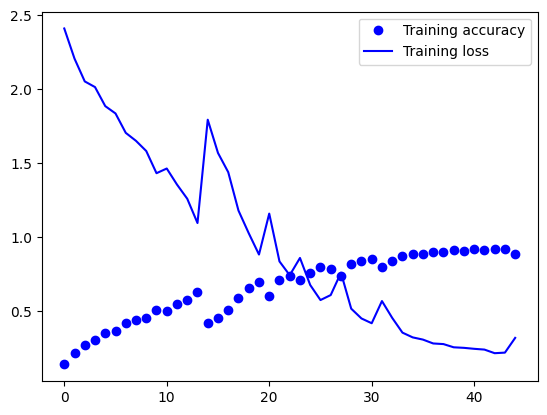

In [28]:
test = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

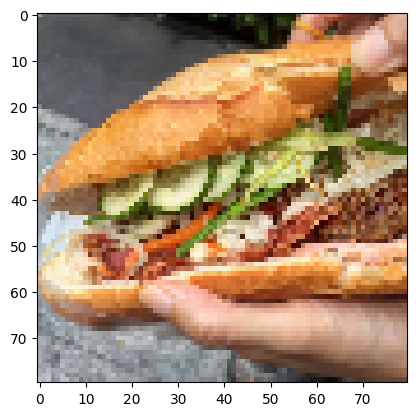

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
# Use testmodel to evalute trainmodel

# Load photo in testmodel
img = X_test[10]
plt.imshow(img)
plt.show()
print(y_test[10])

In [33]:
X_pred = X_test[10].reshape(1,80,80,3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 355ms/step


array([5])

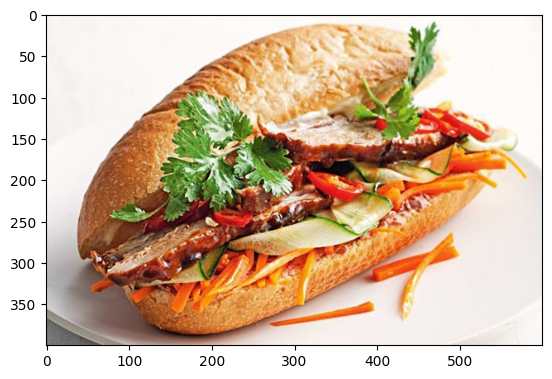

In [34]:
# #IMPORT A PICTURE FOR MODEL PREDICT
url = '/content/bánh mì.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

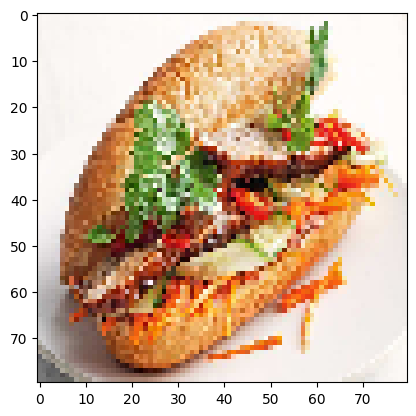

In [35]:
img = load_img(url, target_size = (80,80,3))
plt.imshow(img)

In [36]:
img = img_to_array(img)
img = img.reshape(1,80,80,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 20ms/step


array([2])